# Assignment 01

### Breast Cancer Diagnostics with Bayesian Networks

     Attribute                    Code   Domain     
   -------------------------------------------------
    Sample code number            SCN    id number
    Clump Thickness               CT     1 - 10
    Uniformity of Cell Size       UCSI   1 - 10
    Uniformity of Cell Shape      UCSH   1 - 10
    Marginal Adhesion             MA     1 - 10
    Single Epithelial Cell Size   SECS   1 - 10
    Bare Nuclei                   BN     1 - 10
    Bland Chromatin               BC     1 - 10
    Normal Nucleoli               NN     1 - 10
    Mitoses                       M      1 - 10
    Class                         C      (2 for benign, 4 for malignant)

In [ ]:
!pip install pgmpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nx

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
data = pd.read_csv('breast-cancer.csv')
data.head()

,SCN,CT,UCSI,UCSH,MA,SECS,BN,BC,NN,M,C
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


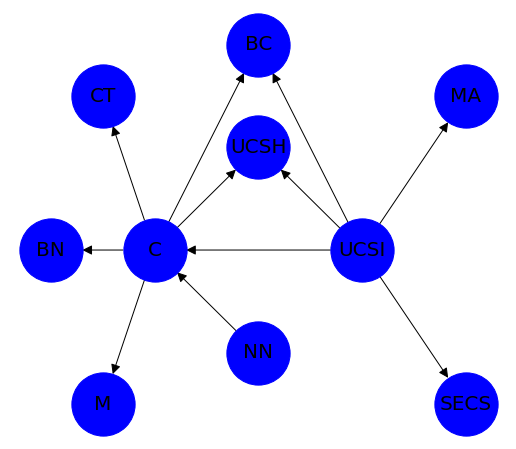

In [4]:
model = BayesianModel([('UCSI', 'C'), ('UCSI', 'UCSH'), ('NN', 'C'), ('C', 'UCSH'), ('C', 'BC'), ('UCSI', 'BC'), ('UCSI', 'MA'), ('UCSI', 'SECS'), ('C', 'M'), ('C', 'BN'), ('C', 'CT')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

fid, ax = plt.subplots(figsize=(9,8))
positions = {'CT':(1,6), 'UCSI':(6,3), 'UCSH':(4,5), 'MA':(8,6), 'SECS':(8,0),'BN':(0,3), 'BC':(4,7), 'NN':(4,1), 'M':(1,0), 'C':(2,3)}

nx.draw(model, pos=positions, with_labels=True, node_size= 4000, font_size = 20, arrowsize=20, node_color='blue', ax=ax)

In [ ]:
model.check_model()

In [ ]:
model.get_cpds()

In [ ]:
print(model.get_cpds('BN'))
print(model.get_cpds('CT'))
print(model.get_cpds('M'))
print(model.get_cpds('C'))
print(model.get_cpds('BC'))
print(model.get_cpds('UCSH'))
print(model.get_cpds('NN'))
print(model.get_cpds('UCSI'))
print(model.get_cpds('MA'))
print(model.get_cpds('SECS'))

#### Inference

Query 1  -  Which class does patient belong if the Uniformity of Cell Size is 8 and Normal Nucleoli is 1 ?

Query 2  -  What is the probable value of Uniformity of Cell Shape given that Class is Benign and Uniformity of Cell Size is 1 ?

Query 3  -  What type of Bland Chormatin is observed in a malignant Class patient having Unif0rmity of Cell Size value to be 4 ? 

Query 4  -  Predict the Single Epithelial Cell Size of the for the sample given that it has Uniformity of Cell Size 1.

Query 5  -  What can the most probable value of Mitosis if the patient has Class benign ?

In [ ]:
inference = VariableElimination(model)

query1 = inference.map_query(variables=['C'], evidence={'NN':1, 'UCSI': 8})
print(query1)

query2 = inference.map_query(variables=['UCSH'], evidence={'C':2, 'UCSI':1})
print(query2)

query3 = inference.map_query(variables=['BC'], evidence={'C':4, 'UCSI': 4})
print(query3)

query4 = inference.map_query(variables=['SECS'], evidence={'UCSI':1})
print(query4)

query5 = inference.map_query(variables=['M'], evidence={'C':2})
print(query5)

In [9]:
infe = {'Query1': [[key for key in query1.keys()][0], [value for value in query1.values()][0]],
        'Query2': [[key for key in query2.keys()][0], [value for value in query2.values()][0]],
        'Query3': [[key for key in query3.keys()][0], [value for value in query3.values()][0]],
        'Query4': [[key for key in query4.keys()][0], [value for value in query4.values()][0]],
        'Query5': [[key for key in query5.keys()][0], [value for value in query5.values()][0]]}

result = pd.DataFrame(infe)
result.to_csv('output.csv', index=False)
result

,Query1,Query2,Query3,Query4,Query5
0,C,UCSH,BC,SECS,M
1,4,1,4,2,1


#### Derived Inference

Query 1 - The patient belong to malignant Class if the Uniformity of Cell Size is 8 and Normal Nucleoli is 1.

Query 2 - The probable value of Uniformity of Cell Shape is 1 given that Class is Benign and Uniformity of Cell Size is 1.

Query 3 - The level 4type of Bland Chormatin is observed in a malignant Class patient having Uniformity of Cell Size value to be 4.

Query 4 - Predicted value of the Single Epithelial Cell Size of the for the sample given that it has Uniformity of Cell Size 1 is 2.

Query 5 - The most probable value of Mitosis if the patient has Class benign is 1.

# Assignment 02

In [10]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import ExhaustiveSearch

In [11]:
data.drop(['SCN'], axis=1, inplace=True)
print(data)

     CT  UCSI  UCSH  MA  SECS  BN  BC  NN  M  C
0     5     1     1   1     2   1   3   1  1  2
1     5     4     4   5     7  10   3   2  1  2
2     3     1     1   1     2   2   3   1  1  2
3     6     8     8   1     3   4   3   7  1  2
4     4     1     1   3     2   1   3   1  1  2
..   ..   ...   ...  ..   ...  ..  ..  .. .. ..
694   3     1     1   1     3   2   1   1  1  2
695   2     1     1   1     2   1   1   1  1  2
696   5    10    10   3     7   3   8  10  2  4
697   4     8     6   4     3   4  10   6  1  4
698   4     8     8   5     4   5  10   4  1  4

[699 rows x 10 columns]


In [12]:
model.fit(data, estimator=BayesianEstimator, prior_type="BDeu")

In [68]:
train_data = data[:500]
predict_data= data[500:]

model = BayesianModel([('UCSI', 'C'), ('UCSI', 'UCSH'), ('NN', 'C'), ('C', 'UCSH'), ('C', 'BC'), ('UCSI', 'BC'), ('UCSI', 'MA'), ('UCSI', 'SECS'), ('C', 'M'), ('C', 'BN'), ('C', 'CT')])
model.fit(data)

predict_data = predict_data.copy()
predict_data.drop(['UCSI', 'BC'], axis=1, inplace=True)

y_pred = model.predict(predict_data)
y_pred

100%|██████████| 102/102 [00:04<00:00, 21.46it/s]


,UCSI,BC
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
194,1,2
195,1,2
196,10,7
197,5,7


In [69]:
y_pred = y_pred.to_numpy()
predict_data = data[500:].to_numpy()

In [73]:
UCSI=0
BC=0

for i in range(0,len(y_pred)):
    if y_pred[i][0] == predict_data[i][1]:
        UCSI += 1
    if y_pred[i][1] == predict_data[i][6]:
        BC += 1

UCSI = (UCSI/len(predict_data))*100
BC = (BC/len(predict_data))*100

print("Accuracy of prediction : ")
print("UCSI : ", round(UCSI,2), "%")
print("BC : ", round(BC,2), "%")

Accuracy of prediction : 
UCSI :  81.91 %
BC :  36.68 %
